# Sales Visualization

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

sys.path.append("..")

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Spark libs
from pyspark.sql.session import SparkSession

# helpers
from helpers.data_prep_and_print import print_df
from helpers.path_translation import translate_to_file_string

Select the Imput File

In [2]:
inputFile = translate_to_file_string("../data/sales.csv")

SparkSession creation

In [3]:
spark = (SparkSession
       .builder
       .appName("SalesVisualization")
       .getOrCreate())

22/05/09 15:58:53 WARN Utils: Your hostname, Christophs-MacBook-Pro-2.local resolves to a loopback address: 127.0.0.1; using 10.154.98.175 instead (on interface en0)
22/05/09 15:58:53 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/09 15:58:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Create a DataFrame using an ifered schema 

In [4]:
df = spark.read.option("header", "true") \
       .option("inferSchema", "true") \
       .option("delimiter", ",") \
       .csv(inputFile)
print(df.printSchema())

root
 |-- division: string (nullable = true)
 |-- level of education: string (nullable = true)
 |-- training level: integer (nullable = true)
 |-- work experience: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- sales: integer (nullable = true)

None


## Plot the data

In [5]:
print_df(df,20)

,division,level of education,training level,work experience,salary,sales
0,peripherals,associate's degree,1,2,66214,198118
1,computer software,high school,2,13,127960,516789
2,office supplies,some college,1,10,117815,488147
3,office supplies,associate's degree,0,8,86262,305425
4,printers,associate's degree,3,9,119967,489670
5,office supplies,some college,2,3,71391,268141
6,peripherals,some college,0,10,101586,390164
7,computer hardware,associate's degree,0,5,84743,250639
8,peripherals,some college,3,4,84673,336158
9,office supplies,associate's degree,2,6,93883,354060


Saving figure attribute_box_plots


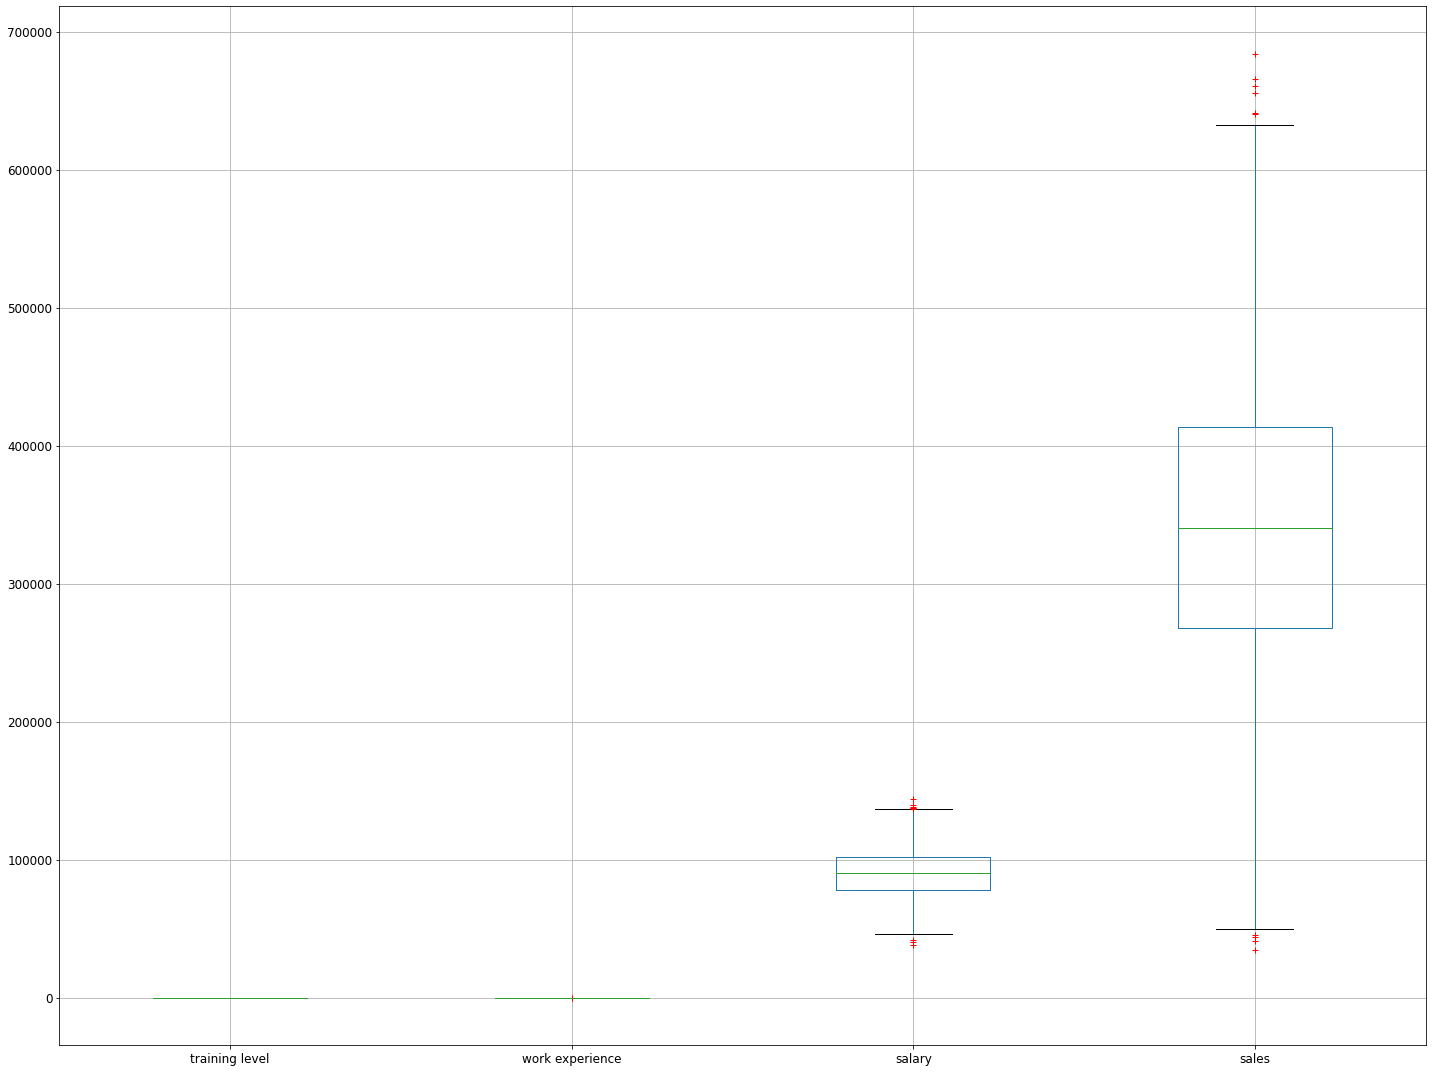

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.toPandas().boxplot(sym='r+', figsize=(20,15))
save_fig("attribute_box_plots")
plt.show()

Saving figure attribute_histogram_plots


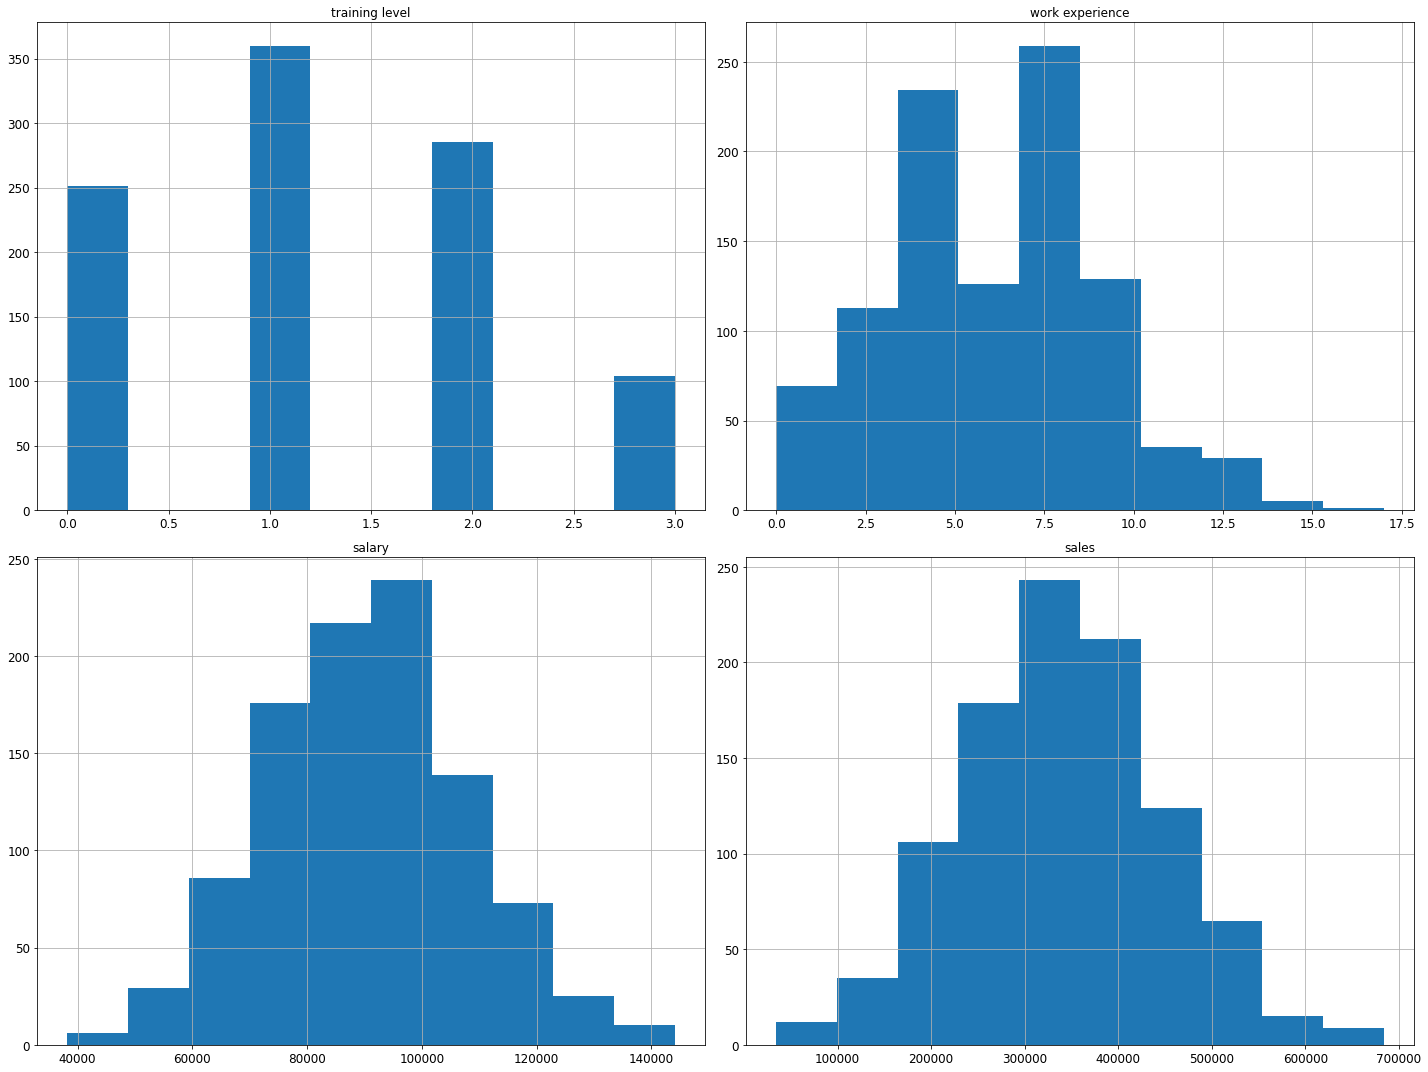

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.toPandas().hist(bins=10, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Saving figure attribute_density_plots


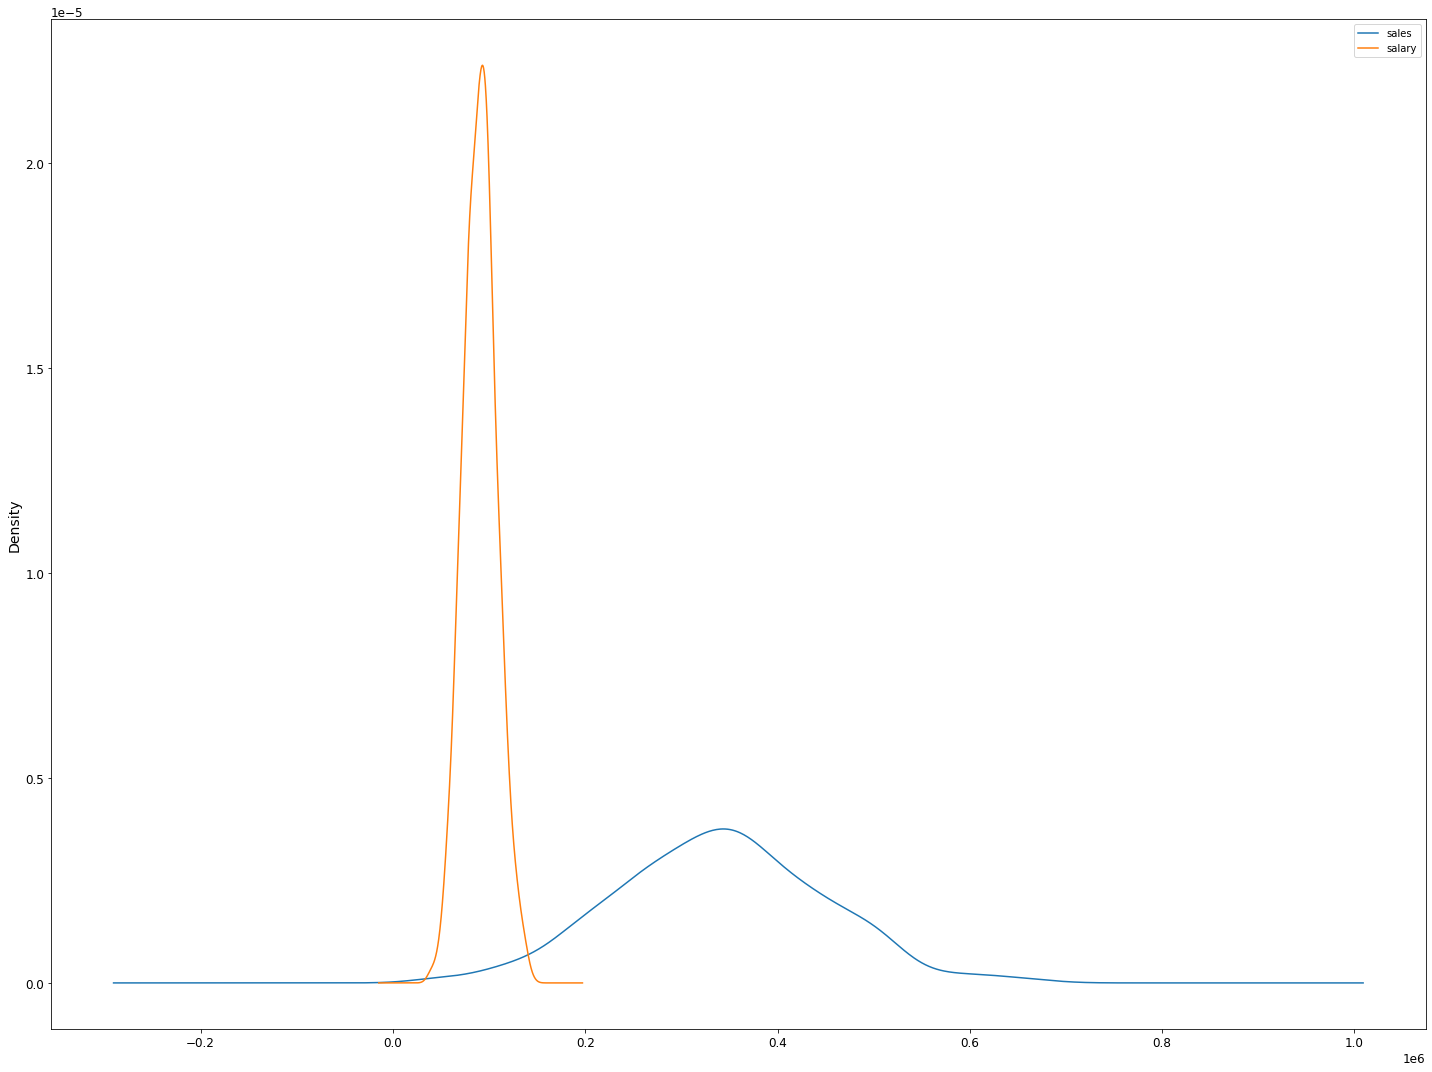

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
df.select( "sales", "salary").toPandas().plot.kde(figsize=(20,15))
save_fig("attribute_density_plots")
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df.toPandas(), alpha=0.2, figsize=(30, 30), diagonal='kde')
save_fig("scatter_matrix")
plt.show()

In [6]:
spark.stop()